In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
import seaborn as sns
from joblib import dump , load
import json

In [57]:
df = pd.read_csv("Mobile phone price.csv")

# Data Preprocessing

In [58]:
df.head(15)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
5,Apple,iPhone 13,128 GB,4 GB,6.1,12 + 12,2815,799
6,Samsung,Galaxy Z Flip3,256 GB,8 GB,6.7,12 + 12,3300,999
7,Xiaomi,Poco X3 Pro,128 GB,6 GB,6.67,48 + 8 + 2 + 2,5160,249
8,Oppo,Reno6 Pro+ 5G,128 GB,8 GB,6.55,50 + 13 + 16 + 2,4500,699
9,Vivo,X70 Pro+,256 GB,12 GB,6.78,50 + 48 + 12 + 8,4500,1199


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [60]:
df.duplicated().sum()


26

In [61]:
#remove duplicates
df.drop_duplicates(inplace = True)
df.shape


(381, 8)

In [62]:
df['Screen Size (inches)'].value_counts()

Screen Size (inches)
6.5               100
6.67               26
6.4                26
6.7                24
6.55               21
6.43               20
6.51               17
6.1                16
6.53               15
6.58               14
6.6                14
6.52               13
6.8                 8
6.44                8
6.39                6
6.3                 4
6.82                4
6.81                4
6.2                 4
6.78                4
4.7                 4
6.62                3
6.9                 3
4.5                 2
5.4                 2
5.5                 2
6                   2
6.72                2
6.15                1
7.6 (unfolded)      1
6.49                1
6.47                1
5.7                 1
6.8 + 3.9           1
6.76                1
6.35                1
6.22                1
5.99                1
5.9                 1
6.56                1
6.57                1
Name: count, dtype: int64

In [63]:
df[df['Screen Size (inches)'] == '6.8 + 3.9']

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
88,LG,Wing,256GB,8GB,6.8 + 3.9,64MP + 13MP + 12MP,4000,$999


In [64]:
df[df['Screen Size (inches)'] == '7.6 (unfolded)']

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
373,Samsung,Galaxy Z Fold2 5G,256,12,7.6 (unfolded),12+12+12,4500,1999


In [65]:
#data cleaning
df['Price ($)']= df['Price ($)'].str.replace('$', '')
df['Price ($)']=df['Price ($)'].str.replace(',','').str.strip()
df['Price ($)'] = pd.to_numeric(df['Price ($)'])
df['Price ($)'] = df['Price ($)']

df['RAM '] = df['RAM '].str.replace('GB', '').str.strip()
df['RAM '] = pd.to_numeric(df['RAM '])

df['Storage '] = df['Storage '].str.replace('GB', '').str.strip()
df['Storage '] = pd.to_numeric(df['Storage '])

df.loc[88, 'Screen Size (inches)'] = 6.8
df.loc[373, 'Screen Size (inches)'] = 7.6
df['Screen Size (inches)'] = pd.to_numeric(df['Screen Size (inches)'])
df = df[~(df["Camera (MP)"].str.contains("ToF"))]
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   380 non-null    object 
 1   Model                   380 non-null    object 
 2   Storage                 380 non-null    int64  
 3   RAM                     380 non-null    int64  
 4   Screen Size (inches)    380 non-null    float64
 5   Camera (MP)             380 non-null    object 
 6   Battery Capacity (mAh)  380 non-null    int64  
 7   Price ($)               380 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 26.7+ KB


In [66]:
data = df.copy()

In [67]:
#Create feature "Camera Quality"
def calculate_representative_quality(string):
    string = string.replace("MP","")
    string = string.replace("D","")
    qualities = [float(q) for q in string.split('+')]
    return sum(qualities) / len(qualities)
data["Camera Quality"] = df["Camera (MP)"].apply(calculate_representative_quality)
data = data.drop(['Camera (MP)'], axis=1)

Storage                      Axes(0.125,0.653529;0.227941x0.226471)
RAM                       Axes(0.398529,0.653529;0.227941x0.226471)
Screen Size (inches)      Axes(0.672059,0.653529;0.227941x0.226471)
Battery Capacity (mAh)       Axes(0.125,0.381765;0.227941x0.226471)
Price ($)                 Axes(0.398529,0.381765;0.227941x0.226471)
Camera Quality            Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

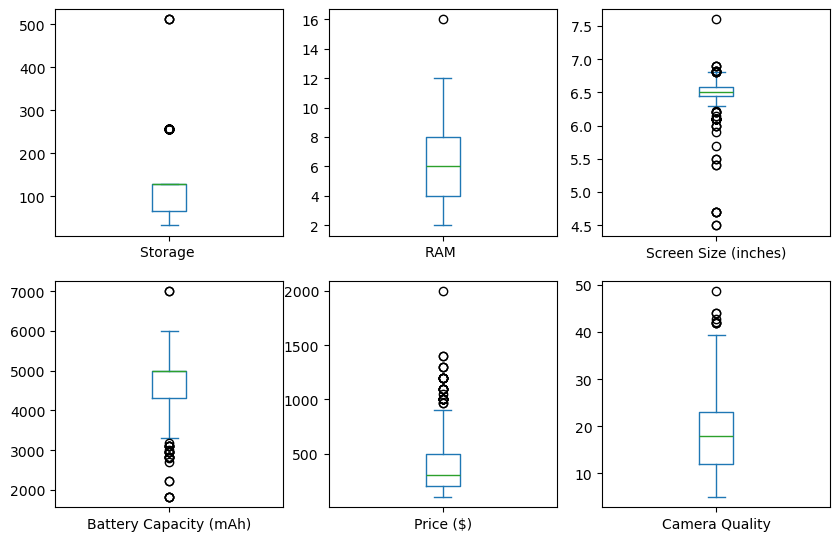

In [68]:
data.plot(kind='box', subplots = True , figsize = (10,10) , layout = (3,3))

In [69]:
data[data["Battery Capacity (mAh)"] < 2500].count()

Brand                     6
Model                     6
Storage                   6
RAM                       6
Screen Size (inches)      6
Battery Capacity (mAh)    6
Price ($)                 6
Camera Quality            6
dtype: int64

In [70]:
#remove outliers from storage
index = df[(df['Storage '] > 256)].index
data.drop(index= index, inplace=True)

#removing outliers from RAM
data.drop(index= data[(data['RAM '] > 12)].index, inplace=True)

#removing outliers from price
data.drop(index= data[(data['Price ($)'] > 1300)].index, inplace=True)

#removing outliers from battery capacity
data.drop(index= data[(data['Battery Capacity (mAh)'] > 6100) | (data['Battery Capacity (mAh)'] < 3000)].index, inplace=True)

#removing outliers from Screen size
data.drop(index= data[(data["Screen Size (inches)"] > 7) | (data["Screen Size (inches)"] < 5)].index, inplace=True)

#removing outliers from camera quality
data.drop(index= data[(data['Camera Quality'] > 40)].index, inplace=True)

Storage                      Axes(0.125,0.653529;0.227941x0.226471)
RAM                       Axes(0.398529,0.653529;0.227941x0.226471)
Screen Size (inches)      Axes(0.672059,0.653529;0.227941x0.226471)
Battery Capacity (mAh)       Axes(0.125,0.381765;0.227941x0.226471)
Price ($)                 Axes(0.398529,0.381765;0.227941x0.226471)
Camera Quality            Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

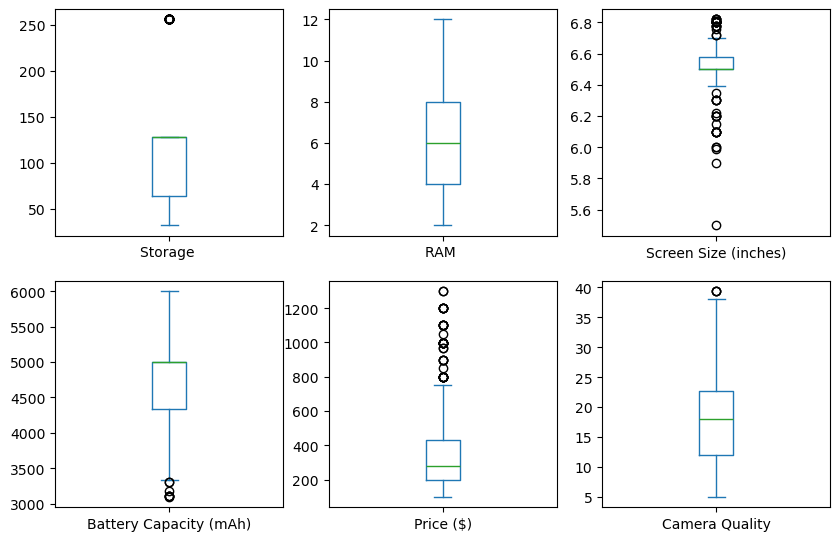

In [71]:
data.plot(kind='box', subplots = True , figsize = (10,10) , layout = (3,3))

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 347 entries, 0 to 405
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   347 non-null    object 
 1   Model                   347 non-null    object 
 2   Storage                 347 non-null    int64  
 3   RAM                     347 non-null    int64  
 4   Screen Size (inches)    347 non-null    float64
 5   Battery Capacity (mAh)  347 non-null    int64  
 6   Price ($)               347 non-null    int64  
 7   Camera Quality          347 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 24.4+ KB


## Labeling 

In [73]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [74]:
brands = data["Brand"]
data["Brand"] = label_encoder.fit_transform(data["Brand"])
brand_encoding_dict = {category.upper(): label for category, label in zip(brands, data["Brand"])}
models = data["Model"]
data["Model"] = label_encoder.fit_transform(data["Model"])
model_encoding_dict = {category.upper(): label for category, label in zip(models, data["Model"])}

In [76]:
#Saving the labels in a json file
with open('brands.json', 'w') as brand_file:
    json.dump(brand_encoding_dict, brand_file)
with open('models.json', 'w') as model_file:
    json.dump(model_encoding_dict, model_file)

<Axes: >

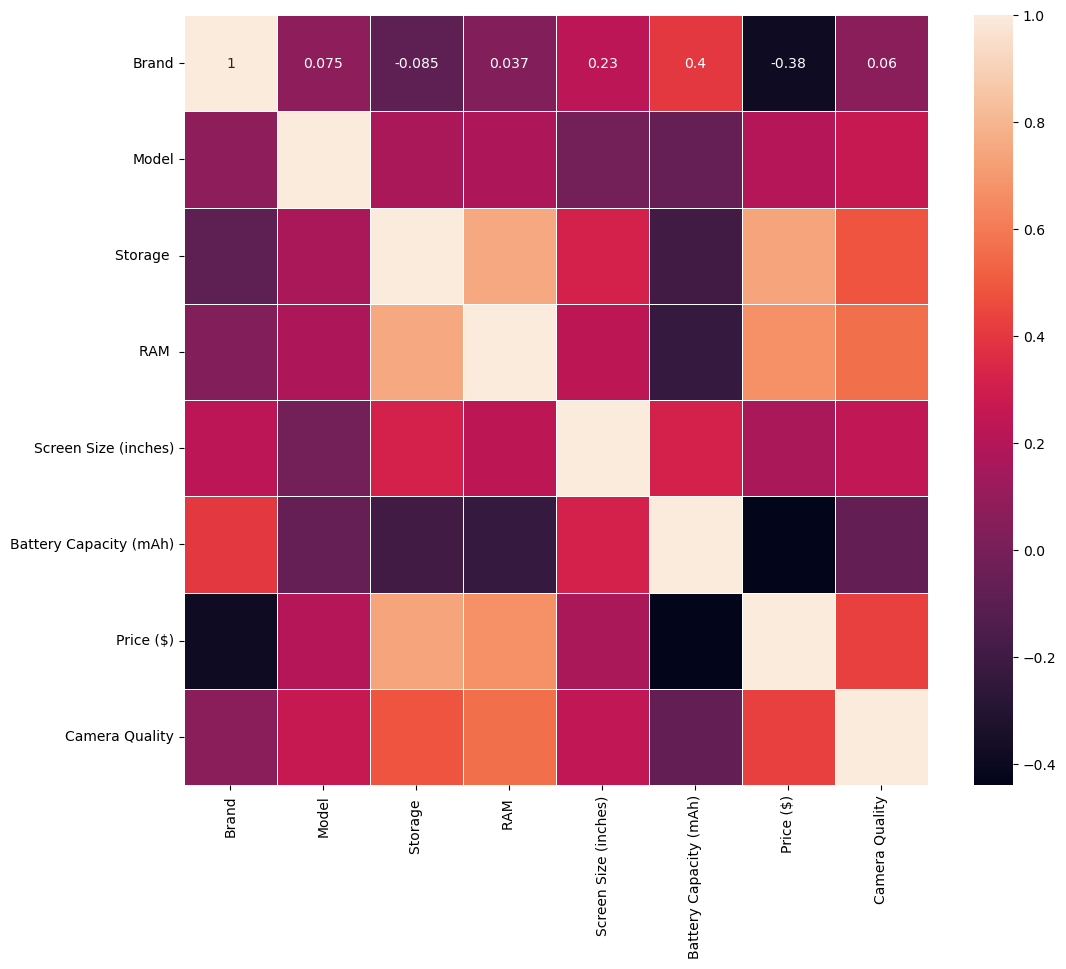

In [77]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True, linewidths=.5)

In [78]:
print(data.corr())

                           Brand     Model  Storage       RAM   \
Brand                   1.000000  0.074905 -0.085124  0.037285   
Model                   0.074905  1.000000  0.170635  0.179118   
Storage                -0.085124  0.170635  1.000000  0.753947   
RAM                     0.037285  0.179118  0.753947  1.000000   
Screen Size (inches)    0.226394 -0.015949  0.316772  0.230032   
Battery Capacity (mAh)  0.400227 -0.057312 -0.191332 -0.235365   
Price ($)              -0.384084  0.206474  0.739321  0.671718   
Camera Quality          0.060113  0.266777  0.486803  0.566789   

                        Screen Size (inches)  Battery Capacity (mAh)  \
Brand                               0.226394                0.400227   
Model                              -0.015949               -0.057312   
Storage                             0.316772               -0.191332   
RAM                                 0.230032               -0.235365   
Screen Size (inches)                1.000000 

In [79]:
brand_encoding_dict

{'APPLE': 0,
 'SAMSUNG': 12,
 'ONEPLUS': 9,
 'XIAOMI': 15,
 'GOOGLE': 4,
 'OPPO': 10,
 'VIVO': 14,
 'REALME': 11,
 'NOKIA': 8,
 'SONY': 13,
 'LG': 6,
 'ASUS': 1,
 'MOTOROLA': 7,
 'CAT': 3,
 'BLACKBERRY': 2,
 'HUAWEI': 5}

# Model

In [122]:
from sklearn.model_selection import train_test_split
x = data.drop(['Price ($)'] , axis = 1).values
y = data['Price ($)'].values
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size= 0.05 , random_state= 42)

In [123]:
x_train.shape

(329, 7)

In [124]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler , RobustScaler
ro_scaler= StandardScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.transform(x_test)
dump(ro_scaler, 'scaler.joblib')

['scaler.joblib']

In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

0.7679560809747001
0.2813606343350966


In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth= 4 , max_features= 6)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=4, max_features=6)

In [106]:
rf.score(x_train,y_train)

0.8965620316080454

In [107]:
rf.score(x_test , y_test)

0.5617072834059653

In [108]:
predictions = rf.predict(x_test)

In [109]:
from sklearn.metrics import r2_score

# Assuming y_test contains the true target values corresponding to x_test
r2 = r2_score(y_test, predictions)
print("R^2 Score:", r2)

R^2 Score: 0.5617072834059653


In [110]:
from xgboost import XGBRegressor

In [111]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [112]:
predictions = xgb.predict(x_test)

In [113]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R^2 Score: 0.7816382677849035
MAE: 68.7963155110677
MSE: 19032.044643647452


In [114]:
predictions = xgb.predict(x_train)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_train, predictions)
mae = mean_absolute_error(y_train, predictions)
mse = mean_squared_error(y_train, predictions)

print("R^2 Score:", r2)
print("MAE:", mae)
print("MSE:", mse)

R^2 Score: 0.9971011423851901
MAE: 6.259889434536177
MSE: 212.27252174132678


In [115]:
dump(xgb,"MobilePriceModel.joblib")

['MobilePriceModel.joblib']

In [116]:
prediction = xgb.predict([x_test[17]])
print(prediction)

[764.33105]


In [117]:
x_test[0]

array([ 1.20668832,  1.03115678,  0.14691991,  0.067765  ,  1.01606036,
        0.3660076 , -0.25684985])

In [125]:
type(x_test[0])

numpy.ndarray

In [118]:
y_test[17]

1299

In [119]:
model_encoding_dict

{'IPHONE 13 PRO': 212,
 'GALAXY S21 ULTRA': 95,
 '9 PRO': 19,
 'REDMI NOTE 10 PRO': 163,
 'PIXEL 6': 147,
 'GALAXY Z FLIP3': 99,
 'POCO X3 PRO': 151,
 'RENO6 PRO+ 5G': 177,
 'X70 PRO+': 188,
 'NORD CE 5G': 138,
 'GALAXY A52S 5G': 78,
 'GT NEO2': 62,
 'FIND X3 PRO': 56,
 'MI 11 LITE 5G NE': 108,
 'GALAXY S21': 94,
 'Y20S (G)': 197,
 '8S 5G': 17,
 'A94': 37,
 'REDMI 10 PRIME': 155,
 'GALAXY A22 5G': 71,
 'NARZO 50 PRO 5G': 132,
 '9': 18,
 'REDMI NOTE 10 PRO MAX': 164,
 'IPHONE 11': 209,
 'GALAXY A03S': 64,
 'A74 5G': 34,
 'Y12S (2021)': 193,
 '9I': 20,
 'GALAXY M52 5G': 90,
 'REDMI 10': 154,
 'A53S': 28,
 'Y33S': 202,
 'C25S': 47,
 'GALAXY A22 4G': 70,
 'NORD 2 5G': 137,
 'POCO M3 PRO 5G': 149,
 'A16': 24,
 'C21Y': 45,
 'GALAXY F22': 81,
 'F19 PRO+ 5G': 53,
 'MI 11X': 110,
 'V21E': 182,
 '8 5G': 12,
 'GALAXY M12': 85,
 'A16S': 25,
 'REDMI 9 POWER': 158,
 'IPHONE 11 PRO MAX': 210,
 'Y20G': 195,
 'NARZO 50I': 134,
 'A54': 30,
 'REDMI 9T': 160,
 'IPHONE 13 PRO MAX': 213,
 'Y33': 201,
 'GALA

In [120]:
len(model_encoding_dict)

215

In [121]:
len(brand_encoding_dict)

16